<a href="https://colab.research.google.com/github/WilliamMejiaG/ML_based_novel_catalysts_discovery/blob/main/Published_Data_ML_Based_Heterogeneous_Catalysts_Discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
df = pd.read_excel('/content/drive/MyDrive/CODING_DOJO/CATALYST_LITERATURE/Catalyst_Data_Base_Water_Gas_Shift.xlsx', skiprows=1)
df.head()

,Total # of Data,Reference,Data,Pt,Au,Ru,Rh,Ir,Cu,Pd,IWI,WI,CI,SI,SGP,CP,HDP,UGC,SCT,FSP,ME,DP,Calc T (oC),Calc T. (hr),Al2O3,MgO,CeO2,TiO2,ZEO,MnO,Y203,ZrO2,HAP,ACC,Tb4O7,HfO2,La2O3,Co3O4,ThO2,SiO2,...,CaO,Li,Ce,Co,Mg,Fe,Mn,Zr,K,Ni,Ca,Cs,V,Rb,Y,Na,La,Gd,Yb,Zn,Re,Ti,Cr,Ho,Nd,Tm,Sm,Er,Sr,YSZ,Temperature (C),H2 vol.%,O2 vol.%,CO vol.%,H2O vol.%,CO2 vol.%,CH4 vol.%,TOS (min),F/W (mg.min/ml),CO Conversion
0,1,Andreeva et al.[S1],1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,25,0.0,0.0,0,1.0,0.0,0,0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,140.0,0.0,0.0,4.498,30.6,0.0,0.0,60.0,2.0,7.6
1,2,Andreeva et al.[S1],2,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,25,0.0,0.0,0,1.0,0.0,0,0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,140.0,0.0,0.0,4.498,30.6,0.0,0.0,60.0,2.0,11.1
2,3,Andreeva et al.[S1],3,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,25,0.0,0.0,0,1.0,0.0,0,0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,140.0,0.0,0.0,4.498,30.6,0.0,0.0,60.0,2.0,18.0
3,4,Andreeva et al.[S1],4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,25,0.0,0.0,0,1.0,0.0,0,0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,170.0,0.0,0.0,4.498,30.6,0.0,0.0,60.0,2.0,13.2
4,5,Andreeva et al.[S1],5,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,25,0.0,0.0,0,1.0,0.0,0,0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,170.0,0.0,0.0,4.498,30.6,0.0,0.0,60.0,2.0,26.3


In [10]:
df.shape

(4360, 84)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4360 entries, 0 to 4359
Data columns (total 84 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Total # of Data  4360 non-null   int64  
 1   Reference        4360 non-null   object 
 2   Data             4360 non-null   int64  
 3   Pt               4360 non-null   float64
 4   Au               4360 non-null   float64
 5   Ru               4360 non-null   float64
 6   Rh               4360 non-null   float64
 7   Ir               4360 non-null   float64
 8   Cu               4360 non-null   float64
 9   Pd               4360 non-null   float64
 10  IWI              4360 non-null   int64  
 11  WI               4360 non-null   int64  
 12  CI               4360 non-null   int64  
 13  SI               4360 non-null   int64  
 14  SGP              4360 non-null   int64  
 15  CP               4360 non-null   int64  
 16  HDP              4360 non-null   int64  
 17  UGC           

In [12]:
df.columns

Index(['Total # of Data', 'Reference', 'Data', 'Pt', 'Au', 'Ru', 'Rh', 'Ir',
       'Cu', 'Pd', 'IWI', 'WI', 'CI', 'SI', 'SGP', 'CP', 'HDP', 'UGC', 'SCT',
       'FSP', 'ME', 'DP', 'Calc T (oC)', 'Calc T. (hr)', 'Al2O3', 'MgO',
       'CeO2', 'TiO2', 'ZEO', 'MnO', 'Y203', 'ZrO2', 'HAP', 'ACC', 'Tb4O7',
       'HfO2', 'La2O3', 'Co3O4', 'ThO2', 'SiO2', 'Fe2O3', 'Sm2O3', 'Gd2O3',
       'Yb2O3', 'CaO', 'Li', 'Ce', 'Co', 'Mg', 'Fe', 'Mn', 'Zr', 'K', 'Ni',
       'Ca', 'Cs', 'V', 'Rb', 'Y', 'Na', 'La', 'Gd', 'Yb', 'Zn', 'Re', 'Ti',
       'Cr', 'Ho', 'Nd', 'Tm', 'Sm', 'Er', 'Sr', 'YSZ', 'Temperature (C)',
       'H2 vol.%', 'O2 vol.%', 'CO vol.%', 'H2O vol.%', 'CO2 vol.%',
       'CH4 vol.%', 'TOS (min)', 'F/W (mg.min/ml)', 'CO Conversion'],
      dtype='object')

# Columns describing Base Metal wt% (BM)

In [13]:
df = df.rename(columns = {'Pt':'BM_Pt', 'Au':'BM_Au','Ru':'BM_Ru','Rh':'BM_Rh','Ir':'BM_Ir','Cu':'BM_Cu','Pd':'BM_Pd'})

In [14]:
df.columns

Index(['Total # of Data', 'Reference', 'Data', 'BM_Pt', 'BM_Au', 'BM_Ru',
       'BM_Rh', 'BM_Ir', 'BM_Cu', 'BM_Pd', 'IWI', 'WI', 'CI', 'SI', 'SGP',
       'CP', 'HDP', 'UGC', 'SCT', 'FSP', 'ME', 'DP', 'Calc T (oC)',
       'Calc T. (hr)', 'Al2O3', 'MgO', 'CeO2', 'TiO2', 'ZEO', 'MnO', 'Y203',
       'ZrO2', 'HAP', 'ACC', 'Tb4O7', 'HfO2', 'La2O3', 'Co3O4', 'ThO2', 'SiO2',
       'Fe2O3', 'Sm2O3', 'Gd2O3', 'Yb2O3', 'CaO', 'Li', 'Ce', 'Co', 'Mg', 'Fe',
       'Mn', 'Zr', 'K', 'Ni', 'Ca', 'Cs', 'V', 'Rb', 'Y', 'Na', 'La', 'Gd',
       'Yb', 'Zn', 'Re', 'Ti', 'Cr', 'Ho', 'Nd', 'Tm', 'Sm', 'Er', 'Sr', 'YSZ',
       'Temperature (C)', 'H2 vol.%', 'O2 vol.%', 'CO vol.%', 'H2O vol.%',
       'CO2 vol.%', 'CH4 vol.%', 'TOS (min)', 'F/W (mg.min/ml)',
       'CO Conversion'],
      dtype='object')

# Columns describing Catalyst Preparation Methods (CPM)

In [15]:
df = df.rename(columns = {'IWI':'CPM_IWI','WI':'CPM_WI','CI':'CPM_CI','SI':'CPM_SI','SGP':'CPM_SGP','CP':'CPM_CP',
                          'HDP':'CPM_HDP','UGC':'CPM_UGC','SCT':'CPM_SCT','FSP':'CPM_FSP','ME':'CPM_ME','DP':'CPM_DP'})

In [16]:
df.columns

Index(['Total # of Data', 'Reference', 'Data', 'BM_Pt', 'BM_Au', 'BM_Ru',
       'BM_Rh', 'BM_Ir', 'BM_Cu', 'BM_Pd', 'CPM_IWI', 'CPM_WI', 'CPM_CI',
       'CPM_SI', 'CPM_SGP', 'CPM_CP', 'CPM_HDP', 'CPM_UGC', 'CPM_SCT',
       'CPM_FSP', 'CPM_ME', 'CPM_DP', 'Calc T (oC)', 'Calc T. (hr)', 'Al2O3',
       'MgO', 'CeO2', 'TiO2', 'ZEO', 'MnO', 'Y203', 'ZrO2', 'HAP', 'ACC',
       'Tb4O7', 'HfO2', 'La2O3', 'Co3O4', 'ThO2', 'SiO2', 'Fe2O3', 'Sm2O3',
       'Gd2O3', 'Yb2O3', 'CaO', 'Li', 'Ce', 'Co', 'Mg', 'Fe', 'Mn', 'Zr', 'K',
       'Ni', 'Ca', 'Cs', 'V', 'Rb', 'Y', 'Na', 'La', 'Gd', 'Yb', 'Zn', 'Re',
       'Ti', 'Cr', 'Ho', 'Nd', 'Tm', 'Sm', 'Er', 'Sr', 'YSZ',
       'Temperature (C)', 'H2 vol.%', 'O2 vol.%', 'CO vol.%', 'H2O vol.%',
       'CO2 vol.%', 'CH4 vol.%', 'TOS (min)', 'F/W (mg.min/ml)',
       'CO Conversion'],
      dtype='object')

# Columns describing Calcination Conditions (CC)

In [17]:
df = df.rename(columns={'Calc T (oC)':'Calc_temp','Calc T. (hr)':'Calc_time'})

In [18]:
df.columns

Index(['Total # of Data', 'Reference', 'Data', 'BM_Pt', 'BM_Au', 'BM_Ru',
       'BM_Rh', 'BM_Ir', 'BM_Cu', 'BM_Pd', 'CPM_IWI', 'CPM_WI', 'CPM_CI',
       'CPM_SI', 'CPM_SGP', 'CPM_CP', 'CPM_HDP', 'CPM_UGC', 'CPM_SCT',
       'CPM_FSP', 'CPM_ME', 'CPM_DP', 'Calc_temp', 'Calc_time', 'Al2O3', 'MgO',
       'CeO2', 'TiO2', 'ZEO', 'MnO', 'Y203', 'ZrO2', 'HAP', 'ACC', 'Tb4O7',
       'HfO2', 'La2O3', 'Co3O4', 'ThO2', 'SiO2', 'Fe2O3', 'Sm2O3', 'Gd2O3',
       'Yb2O3', 'CaO', 'Li', 'Ce', 'Co', 'Mg', 'Fe', 'Mn', 'Zr', 'K', 'Ni',
       'Ca', 'Cs', 'V', 'Rb', 'Y', 'Na', 'La', 'Gd', 'Yb', 'Zn', 'Re', 'Ti',
       'Cr', 'Ho', 'Nd', 'Tm', 'Sm', 'Er', 'Sr', 'YSZ', 'Temperature (C)',
       'H2 vol.%', 'O2 vol.%', 'CO vol.%', 'H2O vol.%', 'CO2 vol.%',
       'CH4 vol.%', 'TOS (min)', 'F/W (mg.min/ml)', 'CO Conversion'],
      dtype='object')

# Columns describing Support type (ST)

In [19]:
df = df.rename(columns = {'Al2O3':'ST_Al2O3', 'MgO':'ST_MgO',
       'CeO2':'ST_CeO2', 'TiO2':'ST_TiO2', 'ZEO':'ST_ZEO', 'MnO':'ST_MnO', 'Y203':'ST_Y203', 'ZrO2':'ST_ZrO2', 
       'HAP':'ST_HAP', 'ACC':'ST_ACC', 'Tb4O7':'ST_Tb4O7','HfO2':'ST_HfO2', 'La2O3':'ST_La2O3', 'Co3O4':'ST_Co3O4', 'ThO2':'ST_ThO2', 
       'SiO2':'ST_SiO2', 'Fe2O3':'ST_Fe2O3', 'Sm2O3':'ST_Sm2O3', 'Gd2O3':'ST_Gd2O3','Yb2O3':'ST_Yb2O3', 'CaO':'ST_CaO'})

In [20]:
df.columns

Index(['Total # of Data', 'Reference', 'Data', 'BM_Pt', 'BM_Au', 'BM_Ru',
       'BM_Rh', 'BM_Ir', 'BM_Cu', 'BM_Pd', 'CPM_IWI', 'CPM_WI', 'CPM_CI',
       'CPM_SI', 'CPM_SGP', 'CPM_CP', 'CPM_HDP', 'CPM_UGC', 'CPM_SCT',
       'CPM_FSP', 'CPM_ME', 'CPM_DP', 'Calc_temp', 'Calc_time', 'ST_Al2O3',
       'ST_MgO', 'ST_CeO2', 'ST_TiO2', 'ST_ZEO', 'ST_MnO', 'ST_Y203',
       'ST_ZrO2', 'ST_HAP', 'ST_ACC', 'ST_Tb4O7', 'ST_HfO2', 'ST_La2O3',
       'ST_Co3O4', 'ST_ThO2', 'ST_SiO2', 'ST_Fe2O3', 'ST_Sm2O3', 'ST_Gd2O3',
       'ST_Yb2O3', 'ST_CaO', 'Li', 'Ce', 'Co', 'Mg', 'Fe', 'Mn', 'Zr', 'K',
       'Ni', 'Ca', 'Cs', 'V', 'Rb', 'Y', 'Na', 'La', 'Gd', 'Yb', 'Zn', 'Re',
       'Ti', 'Cr', 'Ho', 'Nd', 'Tm', 'Sm', 'Er', 'Sr', 'YSZ',
       'Temperature (C)', 'H2 vol.%', 'O2 vol.%', 'CO vol.%', 'H2O vol.%',
       'CO2 vol.%', 'CH4 vol.%', 'TOS (min)', 'F/W (mg.min/ml)',
       'CO Conversion'],
      dtype='object')

# Columns describing catalyst promoters

In [22]:
df = df.rename(columns = {'Li':'P_Li', 'Ce':'P_Ce', 'Co':'P_Co', 'Mg':'P_Mg', 'Fe':'P_Fe', 'Mn':'P_Mn', 'Zr':'P_Zr', 'K':'P_K',
       'Ni':'P_Ni', 'Ca':'P_Ca', 'Cs':'P_Cs', 'V':'P_V', 'Rb':'P_Rb', 'Y':'P_Y', 'Na':'P_Na', 'La':'P_La', 'Gd':'P_Gd', 'Yb':'P_Yb', 
       'Zn':'P_Zn', 'Re':'P_Re','Ti':'P_Ti', 'Cr':'P_Cr', 'Ho':'P_Ho', 'Nd':'P_Nd', 'Tm':'P_Tm', 'Sm':'P_Sm', 'Er':'P_Er', 'Sr':'P_Sr', 
       'YSZ':'P_YSZ'})

In [23]:
df.columns

Index(['Total # of Data', 'Reference', 'Data', 'BM_Pt', 'BM_Au', 'BM_Ru',
       'BM_Rh', 'BM_Ir', 'BM_Cu', 'BM_Pd', 'CPM_IWI', 'CPM_WI', 'CPM_CI',
       'CPM_SI', 'CPM_SGP', 'CPM_CP', 'CPM_HDP', 'CPM_UGC', 'CPM_SCT',
       'CPM_FSP', 'CPM_ME', 'CPM_DP', 'Calc_temp', 'Calc_time', 'ST_Al2O3',
       'ST_MgO', 'ST_CeO2', 'ST_TiO2', 'ST_ZEO', 'ST_MnO', 'ST_Y203',
       'ST_ZrO2', 'ST_HAP', 'ST_ACC', 'ST_Tb4O7', 'ST_HfO2', 'ST_La2O3',
       'ST_Co3O4', 'ST_ThO2', 'ST_SiO2', 'ST_Fe2O3', 'ST_Sm2O3', 'ST_Gd2O3',
       'ST_Yb2O3', 'ST_CaO', 'P_Li', 'P_Ce', 'P_Co', 'P_Mg', 'P_Fe', 'P_Mn',
       'P_Zr', 'P_K', 'P_Ni', 'P_Ca', 'P_Cs', 'P_V', 'P_Rb', 'P_Y', 'P_Na',
       'P_La', 'P_Gd', 'P_Yb', 'P_Zn', 'P_Re', 'P_Ti', 'P_Cr', 'P_Ho', 'P_Nd',
       'P_Tm', 'P_Sm', 'P_Er', 'P_Sr', 'P_YSZ', 'Temperature (C)', 'H2 vol.%',
       'O2 vol.%', 'CO vol.%', 'H2O vol.%', 'CO2 vol.%', 'CH4 vol.%',
       'TOS (min)', 'F/W (mg.min/ml)', 'CO Conversion'],
      dtype='object')

In [24]:
df.columns = df.columns.str.replace(' ','_')

In [26]:
df.columns

Index(['Total_#_of_Data', 'Reference', 'Data', 'BM_Pt', 'BM_Au', 'BM_Ru',
       'BM_Rh', 'BM_Ir', 'BM_Cu', 'BM_Pd', 'CPM_IWI', 'CPM_WI', 'CPM_CI',
       'CPM_SI', 'CPM_SGP', 'CPM_CP', 'CPM_HDP', 'CPM_UGC', 'CPM_SCT',
       'CPM_FSP', 'CPM_ME', 'CPM_DP', 'Calc_temp', 'Calc_time', 'ST_Al2O3',
       'ST_MgO', 'ST_CeO2', 'ST_TiO2', 'ST_ZEO', 'ST_MnO', 'ST_Y203',
       'ST_ZrO2', 'ST_HAP', 'ST_ACC', 'ST_Tb4O7', 'ST_HfO2', 'ST_La2O3',
       'ST_Co3O4', 'ST_ThO2', 'ST_SiO2', 'ST_Fe2O3', 'ST_Sm2O3', 'ST_Gd2O3',
       'ST_Yb2O3', 'ST_CaO', 'P_Li', 'P_Ce', 'P_Co', 'P_Mg', 'P_Fe', 'P_Mn',
       'P_Zr', 'P_K', 'P_Ni', 'P_Ca', 'P_Cs', 'P_V', 'P_Rb', 'P_Y', 'P_Na',
       'P_La', 'P_Gd', 'P_Yb', 'P_Zn', 'P_Re', 'P_Ti', 'P_Cr', 'P_Ho', 'P_Nd',
       'P_Tm', 'P_Sm', 'P_Er', 'P_Sr', 'P_YSZ', 'Temperature_(C)', 'H2_vol.%',
       'O2_vol.%', 'CO_vol.%', 'H2O_vol.%', 'CO2_vol.%', 'CH4_vol.%',
       'TOS_(min)', 'F/W_(mg.min/ml)', 'CO_Conversion'],
      dtype='object')

In [27]:
df.head()

,Total_#_of_Data,Reference,Data,BM_Pt,BM_Au,BM_Ru,BM_Rh,BM_Ir,BM_Cu,BM_Pd,CPM_IWI,CPM_WI,CPM_CI,CPM_SI,CPM_SGP,CPM_CP,CPM_HDP,CPM_UGC,CPM_SCT,CPM_FSP,CPM_ME,CPM_DP,Calc_temp,Calc_time,ST_Al2O3,ST_MgO,ST_CeO2,ST_TiO2,ST_ZEO,ST_MnO,ST_Y203,ST_ZrO2,ST_HAP,ST_ACC,ST_Tb4O7,ST_HfO2,ST_La2O3,ST_Co3O4,ST_ThO2,ST_SiO2,...,ST_CaO,P_Li,P_Ce,P_Co,P_Mg,P_Fe,P_Mn,P_Zr,P_K,P_Ni,P_Ca,P_Cs,P_V,P_Rb,P_Y,P_Na,P_La,P_Gd,P_Yb,P_Zn,P_Re,P_Ti,P_Cr,P_Ho,P_Nd,P_Tm,P_Sm,P_Er,P_Sr,P_YSZ,Temperature_(C),H2_vol.%,O2_vol.%,CO_vol.%,H2O_vol.%,CO2_vol.%,CH4_vol.%,TOS_(min),F/W_(mg.min/ml),CO_Conversion
0,1,Andreeva et al.[S1],1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,25,0.0,0.0,0,1.0,0.0,0,0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,140.0,0.0,0.0,4.498,30.6,0.0,0.0,60.0,2.0,7.6
1,2,Andreeva et al.[S1],2,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,25,0.0,0.0,0,1.0,0.0,0,0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,140.0,0.0,0.0,4.498,30.6,0.0,0.0,60.0,2.0,11.1
2,3,Andreeva et al.[S1],3,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,25,0.0,0.0,0,1.0,0.0,0,0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,140.0,0.0,0.0,4.498,30.6,0.0,0.0,60.0,2.0,18.0
3,4,Andreeva et al.[S1],4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,25,0.0,0.0,0,1.0,0.0,0,0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,170.0,0.0,0.0,4.498,30.6,0.0,0.0,60.0,2.0,13.2
4,5,Andreeva et al.[S1],5,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,25,0.0,0.0,0,1.0,0.0,0,0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,170.0,0.0,0.0,4.498,30.6,0.0,0.0,60.0,2.0,26.3


## Base metal exploration

In [28]:
X_BM = df.loc[:,['BM_Pt', 'BM_Au', 'BM_Ru','BM_Rh', 'BM_Ir', 'BM_Cu', 'BM_Pd']]

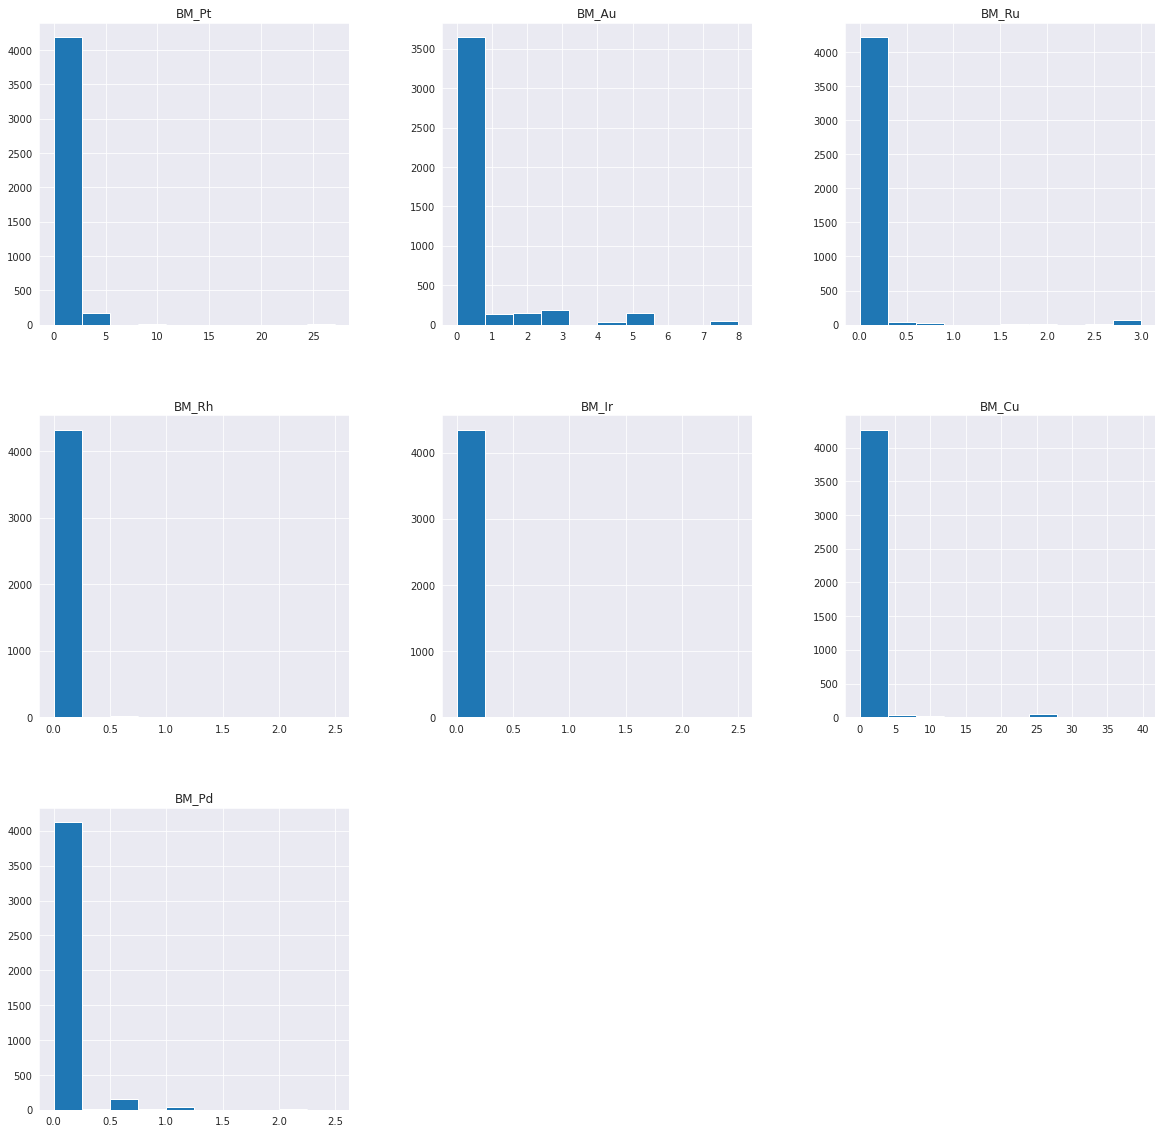

In [54]:
fig, ax = plt.subplots(nrows=1, ncols = 1, figsize = (10,10))
X_BM.hist(figsize=(20,20), )
plt.show()

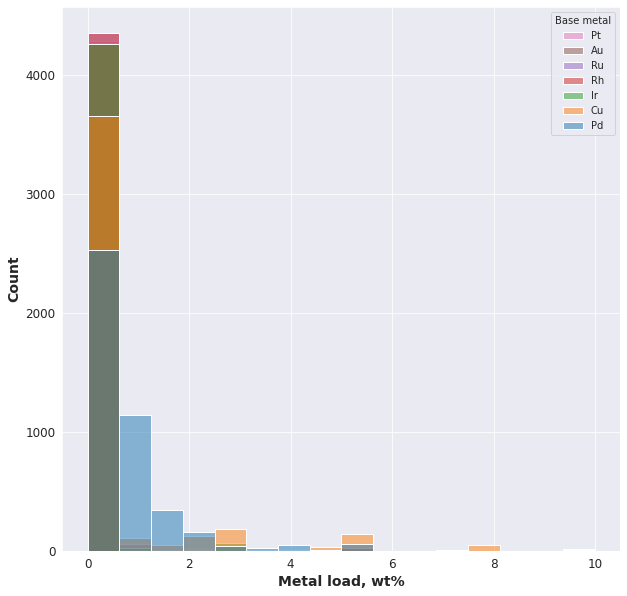

In [61]:
fig, ax = plt.subplots(nrows=1, ncols = 1, figsize = (10,10))
sns.histplot(X_BM, binrange=(0,10),ax = ax)
ax.set_xlabel('Metal load, wt%', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('Count',fontsize = 14, fontweight = 'bold')
ax.tick_params(labelsize  = 12)
ax.legend(title = 'Base metal', labels = ['Pt','Au','Ru','Rh','Ir','Cu','Pd'])
plt.show()

## Promoter exploration

In [79]:
X_P = df.loc[:,['P_Li', 'P_Ce', 'P_Co', 'P_Mg', 'P_Fe', 'P_Mn',
       'P_Zr', 'P_K', 'P_Ni', 'P_Ca', 'P_Cs', 'P_V', 'P_Rb', 'P_Y', 'P_Na',
       'P_La', 'P_Gd', 'P_Yb', 'P_Zn', 'P_Re', 'P_Ti', 'P_Cr', 'P_Ho', 'P_Nd',
       'P_Tm', 'P_Sm', 'P_Er', 'P_Sr', 'P_YSZ']]

In [92]:
X_P_max = pd.DataFrame([X_P[col].max() for col in list(X_P.columns)], columns = ['Max'])

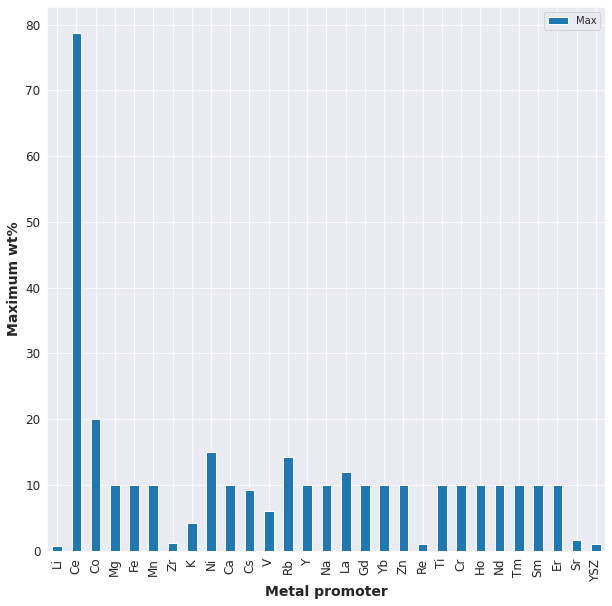

In [98]:
fig, ax = plt.subplots(nrows=1, ncols = 1, figsize = (10,10))
X_P_max.plot(kind = 'bar', ax = ax)
ax.set_xlabel('Metal promoter', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('Maximum wt%',fontsize = 14, fontweight = 'bold')
ax.set_xticklabels(['Li', 'Ce', 'Co', 'Mg', 'Fe', 'Mn', 'Zr', 'K',
       'Ni', 'Ca', 'Cs', 'V', 'Rb', 'Y', 'Na', 'La', 'Gd', 'Yb', 'Zn', 'Re',
       'Ti', 'Cr', 'Ho', 'Nd', 'Tm', 'Sm', 'Er', 'Sr', 'YSZ'])
ax.tick_params(labelsize  = 12)
plt.show()


### Without taking account Ce

In [90]:
X_wo_Ce = df.loc[:,['P_Li','P_Co', 'P_Mg', 'P_Fe', 'P_Mn',
       'P_Zr', 'P_K', 'P_Ni', 'P_Ca', 'P_Cs', 'P_V', 'P_Rb', 'P_Y', 'P_Na',
       'P_La', 'P_Gd', 'P_Yb', 'P_Zn', 'P_Re', 'P_Ti', 'P_Cr', 'P_Ho', 'P_Nd',
       'P_Tm', 'P_Sm', 'P_Er', 'P_Sr', 'P_YSZ']]

In [96]:
X_wo_Ce_max = pd.DataFrame([X_wo_Ce[col].max() for col in list(X_wo_Ce.columns)], columns = ['Max'])

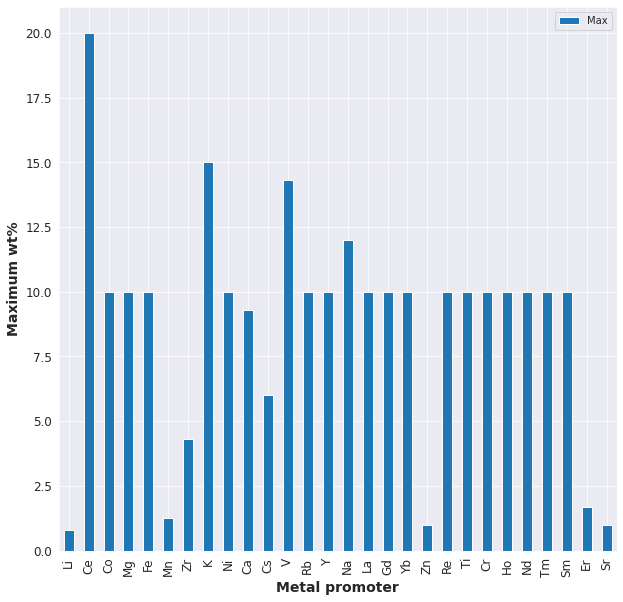

In [99]:
fig, ax = plt.subplots(nrows=1, ncols = 1, figsize = (10,10))
X_wo_Ce_max.plot(kind = 'bar', ax = ax)
ax.set_xlabel('Metal promoter', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('Maximum wt%',fontsize = 14, fontweight = 'bold')
ax.set_xticklabels(['Li', 'Ce', 'Co', 'Mg', 'Fe', 'Mn', 'Zr', 'K',
       'Ni', 'Ca', 'Cs', 'V', 'Rb', 'Y', 'Na', 'La', 'Gd', 'Yb', 'Zn', 'Re',
       'Ti', 'Cr', 'Ho', 'Nd', 'Tm', 'Sm', 'Er', 'Sr', 'YSZ'])
ax.tick_params(labelsize  = 12)
plt.show()